In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import pandas as pd

In [2]:
df_de=pd.read_csv('../../DATA/time_series_60min_cleaned.csv')

In [3]:
df_de.head()

,utc_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,...,DE_tennet_wind_generation_actual,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_load_actual_entsoe_transparency,DE_transnetbw_load_forecast_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_wind_onshore_generation_actual,day_of_week,hour,month
0,2014-12-31 23:00:00+00:00,41151.0,39723.0,37248.0,71.0,0.0019,27913.0,8852.0,0.3171,667.0,...,3866.0,469.0,3398.0,5307.0,4703.0,8.0,5.0,2,23,12
1,2015-01-01 00:00:00+00:00,41151.0,39723.0,37248.0,71.0,0.0019,27913.0,8852.0,0.3171,667.0,...,3866.0,469.0,3398.0,5307.0,4703.0,8.0,5.0,3,0,1
2,2015-01-01 01:00:00+00:00,40135.0,38813.0,37248.0,71.0,0.0019,27913.0,9054.0,0.3244,667.0,...,3974.0,466.0,3508.0,5087.0,4562.0,8.0,7.0,3,1,1
3,2015-01-01 02:00:00+00:00,39106.0,38490.0,37248.0,71.0,0.0019,27913.0,9070.0,0.3249,667.0,...,4194.0,470.0,3724.0,4906.0,4517.0,8.0,8.0,3,2,1
4,2015-01-01 03:00:00+00:00,38765.0,38644.0,37248.0,71.0,0.0019,27913.0,9163.0,0.3283,667.0,...,4446.0,473.0,3973.0,4865.0,4601.0,8.0,11.0,3,3,1


In [5]:
target = "DE_LU_load_actual_entsoe_transparency"


In [6]:
print("y original min:", df_de[target].min())
print("y original max:", df_de[target].max())
print("y original mean:", df_de[target].mean())


y original min: 32237.0
y original max: 77172.0
y original mean: 46640.152536656016


In [7]:
df_de['utc_timestamp'] = pd.to_datetime(df_de['utc_timestamp'])
df_de.set_index('utc_timestamp', inplace=True)


In [8]:
df_de.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50401 entries, 2014-12-31 23:00:00+00:00 to 2020-09-30 23:00:00+00:00
Data columns (total 44 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   DE_load_actual_entsoe_transparency               50401 non-null  float64
 1   DE_load_forecast_entsoe_transparency             50401 non-null  float64
 2   DE_solar_capacity                                50401 non-null  float64
 3   DE_solar_generation_actual                       50401 non-null  float64
 4   DE_solar_profile                                 50401 non-null  float64
 5   DE_wind_capacity                                 50401 non-null  float64
 6   DE_wind_generation_actual                        50401 non-null  float64
 7   DE_wind_profile                                  50401 non-null  float64
 8   DE_wind_offshore_capacity                        50401 non-

In [9]:
X = df_de.drop(columns=[target])
y = df_de[target]


In [10]:
X.columns

Index(['DE_load_actual_entsoe_transparency',
       'DE_load_forecast_entsoe_transparency', 'DE_solar_capacity',
       'DE_solar_generation_actual', 'DE_solar_profile', 'DE_wind_capacity',
       'DE_wind_generation_actual', 'DE_wind_profile',
       'DE_wind_offshore_capacity', 'DE_wind_offshore_generation_actual',
       'DE_wind_offshore_profile', 'DE_wind_onshore_capacity',
       'DE_wind_onshore_generation_actual', 'DE_wind_onshore_profile',
       'DE_50hertz_load_actual_entsoe_transparency',
       'DE_50hertz_load_forecast_entsoe_transparency',
       'DE_50hertz_solar_generation_actual',
       'DE_50hertz_wind_generation_actual',
       'DE_50hertz_wind_offshore_generation_actual',
       'DE_50hertz_wind_onshore_generation_actual',
       'DE_LU_load_forecast_entsoe_transparency', 'DE_LU_price_day_ahead',
       'DE_LU_solar_generation_actual', 'DE_LU_wind_generation_actual',
       'DE_LU_wind_offshore_generation_actual',
       'DE_LU_wind_onshore_generation_actual',
   

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [13]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [14]:
from sklearn.linear_model import Ridge

In [15]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)


Ridge()

In [16]:
import xgboost as xgb
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
xgb = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05
)
xgb.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [18]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
import numpy as np

def evaluate_regression(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"📊 Evaluation Metrics for {model_name}")
    print("-" * 40)
    print(f"MAE   : {mae:.2f} MW")
    print(f"RMSE  : {rmse:.2f} MW")
    print(f"R²    : {r2:.4f}")
    print(f"MAPE  : {mape:.2f} %")
    print("-" * 40)

    return {
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2,
        "MAPE": mape
    }


In [ ]:
ridge_pred = ridge.predict(X_test_scaled)
evaluate_regression(y_test, ridge_pred, "Ridge Regression")


📊 Evaluation Metrics for Ridge Regression
----------------------------------------
MAE   : 2546.30 MW
RMSE  : 3306.50 MW
R²    : 0.8886
MAPE  : 4.85 %
----------------------------------------


{'MAE': 2546.3039282308305,
 'RMSE': np.float64(3306.5018166300456),
 'R2': 0.8885956659207546,
 'MAPE': np.float64(4.854548665026639)}

In [ ]:
xgb_pred = xgb.predict(X_test)
evaluate_regression(y_test, xgb_pred, "XGBoost")


📊 Evaluation Metrics for XGBoost
----------------------------------------
MAE   : 173.25 MW
RMSE  : 413.08 MW
R²    : 0.9983
MAPE  : 0.34 %
----------------------------------------


{'MAE': 173.24568533937605,
 'RMSE': np.float64(413.08215035008203),
 'R2': 0.9982612489152507,
 'MAPE': np.float64(0.3433195443626664)}

In [ ]:
trained_features = [
 'DE_load_actual_entsoe_transparency',
 'DE_load_forecast_entsoe_transparency',
 'DE_solar_capacity',
 'DE_solar_generation_actual',
 'DE_solar_profile',
 'DE_wind_capacity',
 'DE_wind_generation_actual',
 'DE_wind_profile',
 'DE_wind_offshore_capacity',
 'DE_wind_offshore_generation_actual',
 'DE_wind_offshore_profile',
 'DE_wind_onshore_capacity',
 'DE_wind_onshore_generation_actual',
 'DE_wind_onshore_profile',
 'DE_50hertz_load_actual_entsoe_transparency',
 'DE_50hertz_load_forecast_entsoe_transparency',
 'DE_50hertz_solar_generation_actual',
 'DE_50hertz_wind_generation_actual',
 'DE_50hertz_wind_offshore_generation_actual',
 'DE_50hertz_wind_onshore_generation_actual',
 'DE_LU_load_forecast_entsoe_transparency',
 'DE_LU_price_day_ahead',
 'DE_LU_solar_generation_actual',
 'DE_LU_wind_generation_actual',
 'DE_LU_wind_offshore_generation_actual',
 'DE_LU_wind_onshore_generation_actual',
 'DE_amprion_load_actual_entsoe_transparency',
 'DE_amprion_load_forecast_entsoe_transparency',
 'DE_amprion_solar_generation_actual',
 'DE_amprion_wind_onshore_generation_actual',
 'DE_tennet_load_actual_entsoe_transparency',
 'DE_tennet_load_forecast_entsoe_transparency',
 'DE_tennet_solar_generation_actual',
 'DE_tennet_wind_generation_actual',
 'DE_tennet_wind_offshore_generation_actual',
 'DE_tennet_wind_onshore_generation_actual',
 'DE_transnetbw_load_actual_entsoe_transparency',
 'DE_transnetbw_load_forecast_entsoe_transparency',
 'DE_transnetbw_solar_generation_actual',
 'DE_transnetbw_wind_onshore_generation_actual',
 'day_of_week',
    'hour',
    'month'  
]


In [ ]:
def predict_load(
    input_data,
    model,
    X_scaler,
    y_scaler=None
):
    import pandas as pd
    import numpy as np

    # Create full feature vector
    X_input = pd.DataFrame(
        np.zeros((1, len(trained_features))),
        columns=trained_features
    )

    # Fill known inputs
    for key, value in input_data.items():
        if key in X_input.columns:
            X_input.loc[0, key] = value

    # Scale input
    X_scaled = X_scaler.transform(X_input)

    # Predict
    y_pred = model.predict(X_scaled)

    # FIX: correctly extract scalar
    y_pred = float(y_pred.ravel()[0])

    # Apply inverse scaling ONLY if y was scaled during training
    if y_scaler is not None:
        y_pred = y_scaler.inverse_transform([[y_pred]])[0][0]

    return y_pred


In [ ]:
sample_input = {
    "hour": 10,
    "day_of_week": 1,
    "month": 1,
    "DE_load_forecast_entsoe_transparency": 69000,
    "DE_LU_load_forecast_entsoe_transparency": 68500,
    "DE_LU_price_day_ahead": 95,
    "DE_solar_generation_actual": 4200,
    "DE_solar_capacity": 60000,
    "DE_solar_profile": 0.35,
    "DE_wind_generation_actual": 18000,
    "DE_wind_onshore_generation_actual": 12000,
    "DE_wind_offshore_generation_actual": 6000,
    "DE_wind_profile": 0.55
}


In [ ]:
y_scaler = None


In [ ]:
pred = predict_load(
    input_data=sample_input,
    model=xgb,
    X_scaler=X_scaler,
    y_scaler=y_scaler   # or None
)

print("Predicted Load (MW):", round(pred, 2))


Predicted Load (MW): 35862.05


In [ ]:
print("Model expects:", len(trained_features), "features")
print("Provided:", len(sample_input))


Model expects: 43 features
Provided: 13


In [ ]:
trained_features = X_train.columns.tolist()


In [ ]:
len(trained_features)

43

In [ ]:
import joblib

# Save trained model
joblib.dump(xgb, "xgb_load_model.pkl")

# Save scaler
joblib.dump(X_scaler, "X_scaler.pkl")

# Save feature names
joblib.dump(trained_features, "trained_features.pkl")

print("✅ Model, scaler, and features saved successfully!")


✅ Model, scaler, and features saved successfully!


# Model 2 Annomalies Detection In Electricity 

In [2]:
df_=pd.read_csv('../../DATA/energy_30min_processed.csv')

In [4]:
df_.head()

,utc_timestamp,cet_cest_timestamp,CY_load_actual_entsoe_transparency,CY_load_forecast_entsoe_transparency,CY_wind_onshore_generation_actual,GB_GBN_load_actual_entsoe_transparency,GB_GBN_load_forecast_entsoe_transparency,GB_GBN_solar_capacity,GB_GBN_solar_generation_actual,GB_GBN_solar_profile,...,IE_wind_onshore_generation_actual,IE_sem_load_actual_entsoe_transparency,IE_sem_load_forecast_entsoe_transparency,IE_sem_price_day_ahead,IE_sem_wind_onshore_generation_actual,hour,day_of_week,month,is_weekend,load_diff
0,2014-12-31 23:00:00+00:00,2015-01-01T00:00:00+0100,478.32,601.3,34.59,26758.0,32057.0,2664.0,13.0,0.0049,...,1335.88,3681.37,4039.39,31.91,1721.21,23,2,12,0,-5299.0
1,2014-12-31 23:30:00+00:00,2015-01-01T00:30:00+0100,478.32,601.3,34.59,26758.0,32057.0,2664.0,13.0,0.0049,...,1335.88,3681.37,4039.39,31.91,1721.21,23,2,12,0,-5299.0
2,2015-01-01 00:00:00+00:00,2015-01-01T01:00:00+0100,478.32,601.3,34.59,26758.0,32057.0,2669.0,13.0,0.0049,...,1335.88,3681.37,4039.39,31.91,1721.21,0,3,1,0,-5299.0
3,2015-01-01 00:30:00+00:00,2015-01-01T01:30:00+0100,478.32,601.3,34.59,26758.0,32057.0,2669.0,13.0,0.0049,...,1335.88,3681.37,4039.39,31.91,1721.21,0,3,1,0,-5299.0
4,2015-01-01 01:00:00+00:00,2015-01-01T02:00:00+0100,478.32,601.3,34.59,27561.0,32135.0,2669.0,13.0,0.0049,...,1289.69,3523.20,4039.39,31.91,1675.24,1,3,1,0,-4574.0


In [5]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100802 entries, 0 to 100801
Data columns (total 46 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   utc_timestamp                             100802 non-null  object 
 1   cet_cest_timestamp                        100802 non-null  object 
 2   CY_load_actual_entsoe_transparency        100802 non-null  float64
 3   CY_load_forecast_entsoe_transparency      100802 non-null  float64
 4   CY_wind_onshore_generation_actual         100802 non-null  float64
 5   GB_GBN_load_actual_entsoe_transparency    100802 non-null  float64
 6   GB_GBN_load_forecast_entsoe_transparency  100802 non-null  float64
 7   GB_GBN_solar_capacity                     100802 non-null  float64
 8   GB_GBN_solar_generation_actual            100802 non-null  float64
 9   GB_GBN_solar_profile                      100802 non-null  float64
 10  GB_GBN_wind_capacity

In [6]:
df_.isnull().sum()

utc_timestamp                               0
cet_cest_timestamp                          0
CY_load_actual_entsoe_transparency          0
CY_load_forecast_entsoe_transparency        0
CY_wind_onshore_generation_actual           0
GB_GBN_load_actual_entsoe_transparency      0
GB_GBN_load_forecast_entsoe_transparency    0
GB_GBN_solar_capacity                       0
GB_GBN_solar_generation_actual              0
GB_GBN_solar_profile                        0
GB_GBN_wind_capacity                        0
GB_GBN_wind_generation_actual               0
GB_GBN_wind_profile                         0
GB_GBN_wind_offshore_capacity               0
GB_GBN_wind_offshore_generation_actual      0
GB_GBN_wind_offshore_profile                0
GB_GBN_wind_onshore_capacity                0
GB_GBN_wind_onshore_generation_actual       0
GB_GBN_wind_onshore_profile                 0
GB_NIR_load_actual_entsoe_transparency      0
GB_NIR_load_forecast_entsoe_transparency    0
GB_NIR_solar_capacity             

In [7]:
df_['utc_timestamp'] = pd.to_datetime(df_['utc_timestamp'])
df_['cet_cest_timestamp'] = pd.to_datetime(df_['cet_cest_timestamp'])


C:\Users\parth\AppData\Local\Temp\ipykernel_23232\1476702873.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_['cet_cest_timestamp'] = pd.to_datetime(df_['cet_cest_timestamp'])


In [8]:
# UTC-based features
df_['hour'] = df_['utc_timestamp'].dt.hour
df_['day'] = df_['utc_timestamp'].dt.day
df_['month'] = df_['utc_timestamp'].dt.month
df_['day_of_week'] = df_['utc_timestamp'].dt.dayofweek  # 0=Mon, 6=Sun
df_['is_weekend'] = df_['day_of_week'].isin([5, 6]).astype(int)


In [9]:
df_['week_of_year'] = df_['utc_timestamp'].dt.isocalendar().week.astype(int)


In [10]:
df_.drop(columns=['utc_timestamp', 'cet_cest_timestamp'], inplace=True)


In [11]:
len(df_.dtypes)


46

# Dataset Spliting

In [12]:
target = "GB_GBN_load_actual_entsoe_transparency"


In [13]:
X = df_.drop(columns=[target])
y = df_[target]


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # time series safe
)


# LSTM Model

In [15]:
import numpy as np

def create_sequences(X, y, seq_length=24):
    Xs, ys = [], []
    for i in range(len(X) - seq_length):
        Xs.append(X[i:i+seq_length])
        ys.append(y[i+seq_length])
    return np.array(Xs), np.array(ys)


# Scaling the data

In [16]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y.values.reshape(-1,1))


In [17]:
SEQ_LEN = 24  # last 24 hours

X_seq, y_seq = create_sequences(X_scaled, y_scaled, SEQ_LEN)

# Train-test split (time series split)
split = int(len(X_seq) * 0.8)

X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),

    LSTM(32),
    Dropout(0.2),

    Dense(1)
])

model.compile(
    optimizer="adam",
    loss="mse"
)

model.summary()


c:\Users\parth\anaconda3\envs\requirements\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
c:\Users\parth\anaconda3\envs\requirements\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 64)         │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,609 (158.63 KB)

 Trainable params: 40,609 (158.63 KB)

 Non-trainable params: 0 (0.00 B)

# train the model

In [20]:
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=20,
    batch_size=32,
    verbose=1
)


Epoch 1/20
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 34s 15ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 2/20
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - loss: 6.9530e-04 - val_loss: 0.0018
Epoch 3/20
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 30s 13ms/step - loss: 5.2379e-04 - val_loss: 0.0015
Epoch 4/20
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - loss: 4.5664e-04 - val_loss: 0.0015
Epoch 5/20
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - loss: 4.2375e-04 - val_loss: 0.0013
Epoch 6/20
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - loss: 4.0068e-04 - val_loss: 0.0014
Epoch 7/20
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - loss: 3.8699e-04 - val_loss: 0.0017
Epoch 8/20
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 34s 15ms/step - loss: 3.6957e-04 - val_loss: 0.0013
Epoch 9/20
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - loss: 3.6610e-04 - val_loss: 0.0014
Epoch 10/20
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - loss: 3.5866e-04 - val_loss: 0.0013
Epoch 11/20
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 

In [21]:
y_pred_scaled = model.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_true = y_scaler.inverse_transform(y_test)


630/630 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")


MAE  : 841.28
RMSE : 1667.17


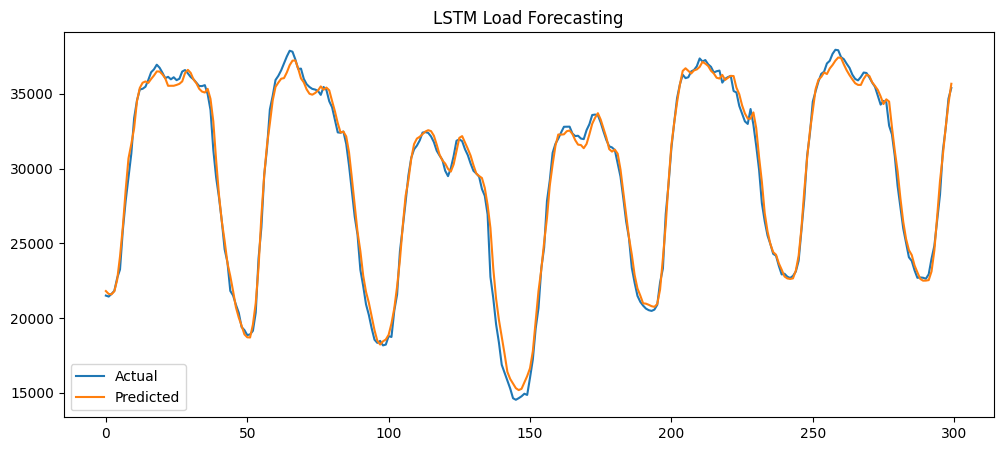

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_true[:300], label="Actual")
plt.plot(y_pred[:300], label="Predicted")
plt.legend()
plt.title("LSTM Load Forecasting")
plt.show()


# Prediction Function

In [24]:
import numpy as np

def predict_next_load(model, last_24_hours, scaler_X, scaler_y):
    """
    Predict the next hour load using a trained LSTM model.

    Parameters:
    - model: Trained LSTM model
    - last_24_hours: np.array of shape (24, num_features), last 24 hours of input features
    - scaler_X: StandardScaler used for input features
    - scaler_y: StandardScaler used for target variable

    Returns:
    - float: predicted load for the next hour
    """

    # 1. Scale input features
    last_24_scaled = scaler_X.transform(last_24_hours)

    # 2. Reshape to 3D array for LSTM: (1, timesteps, features)
    X_input = last_24_scaled.reshape(1, last_24_scaled.shape[0], last_24_scaled.shape[1])

    # 3. Predict (scaled)
    y_pred_scaled = model.predict(X_input, verbose=0)

    # 4. Inverse scale to original units
    y_pred = scaler_y.inverse_transform(y_pred_scaled)

    # Return as float
    return float(y_pred[0][0])


In [25]:
feature_cols = [
    'CY_load_actual_entsoe_transparency',
    'CY_load_forecast_entsoe_transparency',
    'CY_wind_onshore_generation_actual',
    'GB_GBN_load_actual_entsoe_transparency',
    'GB_GBN_load_forecast_entsoe_transparency',
    'GB_GBN_solar_generation_actual',
    'GB_GBN_wind_generation_actual',
    'IE_load_actual_entsoe_transparency',
    'IE_wind_onshore_generation_actual',
    'hour',
    'day',
    'month',
    'is_weekend'
]


In [26]:
print(df_.columns)

Index(['CY_load_actual_entsoe_transparency',
       'CY_load_forecast_entsoe_transparency',
       'CY_wind_onshore_generation_actual',
       'GB_GBN_load_actual_entsoe_transparency',
       'GB_GBN_load_forecast_entsoe_transparency', 'GB_GBN_solar_capacity',
       'GB_GBN_solar_generation_actual', 'GB_GBN_solar_profile',
       'GB_GBN_wind_capacity', 'GB_GBN_wind_generation_actual',
       'GB_GBN_wind_profile', 'GB_GBN_wind_offshore_capacity',
       'GB_GBN_wind_offshore_generation_actual',
       'GB_GBN_wind_offshore_profile', 'GB_GBN_wind_onshore_capacity',
       'GB_GBN_wind_onshore_generation_actual', 'GB_GBN_wind_onshore_profile',
       'GB_NIR_load_actual_entsoe_transparency',
       'GB_NIR_load_forecast_entsoe_transparency', 'GB_NIR_solar_capacity',
       'GB_NIR_wind_onshore_capacity', 'GB_NIR_wind_onshore_generation_actual',
       'GB_UKM_load_actual_entsoe_transparency',
       'GB_UKM_load_forecast_entsoe_transparency', 'GB_UKM_solar_capacity',
       'GB_UKM_sol

In [27]:
# Assuming df_ is your DataFrame and target_col is your load column
import numpy as np

# Select features (exclude target)
feature_cols = df_.columns.drop('GB_GBN_load_actual_entsoe_transparency')

# Take the last 24 rows of features
last_24_hours = df_[feature_cols].tail(24).values  # shape (24, num_features)

print("Shape of last_24_hours:", last_24_hours.shape)


Shape of last_24_hours: (24, 45)


In [28]:
# Assuming df_ has a datetime index
last_24_hours = df_.loc[:'2025-12-27 23:00', feature_cols].tail(24).values


In [29]:
next_hour_load = predict_next_load(model, last_24_hours, X_scaler, y_scaler)
print("Predicted Load for next hour:", next_hour_load)


Predicted Load for next hour: 48173.97265625


c:\Users\parth\anaconda3\envs\requirements\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [30]:
y_test_last24 = df_[feature_cols].tail(24).values
predicted = predict_next_load(model, y_test_last24, X_scaler, y_scaler)
print("Next hour actual:", df_['GB_GBN_load_actual_entsoe_transparency'].iloc[-1])
print("Next hour predicted:", predicted)


Next hour actual: 21528.0
Next hour predicted: 22815.455078125


c:\Users\parth\anaconda3\envs\requirements\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [31]:
X_scaler.n_features_in_


45

In [ ]:
X_scaler

In [ ]:
print(X_scaler.n_features_in_)


In [ ]:
import joblib

# 1. Save the Keras Model
# The .keras extension is the recommended native format for Keras 3
model.save("lstm_load_model.keras")

# 2. Save the Scalers
# joblib is used to save the MinMaxScaler objects so you can reuse them during prediction
joblib.dump(X_scaler, "scaler_X.save")
joblib.dump(y_scaler, "scaler_y.save")

print("Model and scalers saved successfully!")

Model and scalers saved successfully!


In [33]:
model.input_shape


(None, 24, 45)

In [34]:
print("Model expects:", model.input_shape)



Model expects: (None, 24, 45)


In [35]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# ----- X scaler -----
scaler_X = MinMaxScaler()

# reshape BEFORE fitting
X_train_2d = X_train.reshape(-1, 45)   # (samples*24, 45)

scaler_X.fit(X_train_2d)

joblib.dump(scaler_X, "scaler_X.save")


# ----- y scaler -----
scaler_y = MinMaxScaler()
scaler_y.fit(y_train)                  # (samples, 1)

joblib.dump(scaler_y, "scaler_y.save")


['scaler_y.save']

In [36]:
print("DEBUG scaler_X.min_.shape:", scaler_X.min_.shape)
print("DEBUG scaler_X.scale_.shape:", scaler_X.scale_.shape)


DEBUG scaler_X.min_.shape: (45,)
DEBUG scaler_X.scale_.shape: (45,)
